# Project: Wrangling and Analyze Data

In [288]:
import pandas as pd 
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [289]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [290]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(request.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### As the twitter reject my request to access their API I will use the data provided by Udacity.**

In [291]:
list_tweet = []

with open('tweet-json.txt', mode='r') as json_file:
    for a in json_file:
        json_data = json.loads(a)
        tweet_id = json_data['id']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
                
        list_tweet.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count})

#Create new df 
json_df = pd.DataFrame(list_tweet, columns = ['tweet_id', 'favorite_count', 'retweet_count'])


#Save the df in file
json_df.to_csv('tweet-json2.txt', encoding = 'utf-8', index=False)



In [292]:
tweet_json = pd.read_csv('tweet-json2.txt')

In [293]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data

## Visual assessment: 

In [294]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [295]:
twitter_archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None,None,None,None
1252,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581...,10,10,Staniel,None,None,None,None
567,802239329049477120,NaN,NaN,2016-11-25 19:55:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He'll do your taxes for you. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802239329...,12,10,Loki,None,None,None,puppo
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
1090,737678689543020544,NaN,NaN,2016-05-31 16:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737678689...,11,10,None,None,None,None,None
2012,672239279297454080,NaN,NaN,2015-12-03 02:21:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ridley. He doesn't know how to couch. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672239279...,7,10,Ridley,None,None,None,None
361,829501995190984704,NaN,NaN,2017-02-09 01:27:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He was a skater pup. She said see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
683,788412144018661376,NaN,NaN,2016-10-18 16:11:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He breaks hearts for a living....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788412144...,11,10,Dexter,None,None,None,None


In [296]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


variables
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.

In [297]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1077,717537687239008257,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,1,ram,0.499761,False,hog,0.283795,False,ox,0.067455,False
894,699434518667751424,https://pbs.twimg.com/media/CbTj--1XEAIZjc_.jpg,1,golden_retriever,0.836572,True,kuvasz,0.105946,True,Labrador_retriever,0.025144,True
1666,812709060537683968,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1,Irish_setter,0.326873,True,golden_retriever,0.182610,True,Leonberg,0.156912,True
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626,True,black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True


In [298]:
tweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [299]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count
2001,672475084225949696,1529,770
2231,668204964695683073,586,206
665,790581949425475584,22473,8183
580,800443802682937345,0,5068
132,866720684873056260,20888,5168


## Programmatic assessement:

In [300]:
twitter_archive_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [301]:
# look if there duplicated tweets 
twitter_archive_df['tweet_id'].duplicated().sum()

0

In [302]:
twitter_archive_df['tweet_id'].isnull().sum()

0

In [303]:
twitter_archive_df['name'].duplicated().sum()

1399

In [304]:
twitter_archive_df['name'].isnull().sum()

0

In [305]:
twitter_archive_df.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Bailey           7
Buddy            7
Toby             7
an               7
Daisy            7
Jack             6
Koda             6
Jax              6
Milo             6
Oscar            6
Scout            6
Leo              6
Dave             6
Stanley          6
Bella            6
Rusty            6
very             5
              ... 
Howie            1
Shakespeare      1
Jaspers          1
Augie            1
Ito              1
Kuyu             1
Chevy            1
Kota             1
Josep            1
Edgar            1
Brownie          1
by               1
Puff             1
Jo               1
Kaia             1
Jimbo            1
Brandi           1
Aja              1
Juckson          1
Willy            1
Thor             1
Norman      

In [306]:
twitter_archive_df[twitter_archive_df['name'].apply(len) <= 3 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
53,881906580714921986,NaN,NaN,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
77,877736472329191424,NaN,NaN,2017-06-22 03:54:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,None,None,None,None
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None


In [307]:
twitter_archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [308]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [309]:
twitter_archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [310]:
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [311]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [312]:
twitter_archive_df.expanded_urls.duplicated().sum()

137

In [313]:
twitter_archive_df.expanded_urls.isnull().sum()

59

In [314]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [315]:
image_predictions.jpg_url.duplicated().sum()

66

In [316]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                       

In [317]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [318]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
toy_terrier                        20
malinois                           20
Samoyed                            20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [319]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [320]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [321]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [322]:
tweet_json.favorite_count.isnull().sum()

0

In [323]:
tweet_json['favorite_count'].isnull().values.any()

False

In [324]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
#### (twitter archive dataset)

1.Tweet ID should convert to strings (across the tables) + Timestamp should be datetime type 

2.Rating are extracted incorrectly from text, some texts include rating with fractional part.

3.Source hard to read beacuse it inside HTML tags

4.Some name are is Inconsistent such as (a, an, very , the, not, such, quite, o, my, by)

5.Duplicate values in expanded_urls which means its a retweets, therfore must be deleted.

6.Column expanded_urls has missing values. Since the rating based on the image included in the tweet we must delete the null values.


7.inconsistent format for the dogs breeds (some lower and other are upper case) image_predication dataset.
 
8.The columns doggo,floofer,pupper,and puppo assign missing values as (None) instead of NaN.

9.Remove columns with missing data and unnecessary columns such as:

twitter_archive_df: 
in_reply_to_status_id
in_reply_to_user_id
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp 
doggo,floofer,pupper,and puppo

image_predictions_clean:
img_num



Note: I notice that the image prediction has false predictions such as (suit, seat belt, cardigan, computer, etc..) but fixing it will take so much time. 



### Tidiness issues

1.twitter_archive_df: Replace the columns (doggo,floofer,pupper,and puppo) with a one column specify the type


2.Combine the dataframes into one dataframe because it related to each other.


## Cleaning Data
### Quality issues


In [325]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:
#### Tweet ID should convert to strings (across the tables) / Timestamp should be datetime type


#### Define: 
convert the tweet_id columns to string in all dataframes and convert the timestamp to datetime type

#### Code

In [326]:
twitter_archive_df_clean["tweet_id"] = twitter_archive_df_clean["tweet_id"].astype(str)

In [327]:
image_predictions_clean["tweet_id"] = image_predictions_clean["tweet_id"].astype(str)
tweet_json_clean["tweet_id"] = tweet_json_clean["tweet_id"].astype(str)

In [328]:
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])

#### Test

In [329]:
# check if the type has changed 
twitter_archive_df_clean["tweet_id"].dtype

dtype('O')

In [330]:
tweet_json_clean["tweet_id"].dtype

dtype('O')

In [331]:
twitter_archive_df_clean["tweet_id"].dtype

dtype('O')

In [332]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

 ### Issue #2:
 #### Rating are extracted incorrectly from text, some texts include rating with fractional part.

#### Define 
convert the type to float and extract the texts with the rating with fractional part and modified it.

#### Code

In [333]:
# change the type to float 
twitter_archive_df_clean["rating_numerator"] = twitter_archive_df_clean["rating_numerator"].astype(float)

In [334]:
# extract text wanted   
rating_df = twitter_archive_df_clean[twitter_archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [335]:
print(rating_df.text)

45      This is Bella. She hopes her smile made you sm...
340     RT @dog_rates: This is Logan, the Chow who liv...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
1689    I've been told there's a slight possibility he...
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object


In [336]:
# empty list to store the text and the indexs to show it later 
ratings_from_text = []
ratings_index = []

# for loop to append the text and the index to the lists
for i, text in rating_df['text'].iteritems():
        ratings_from_text.append(text)
        ratings_index.append(i)

In [337]:
# for loop to print the text with space 
for i in ratings_from_text:
    print(i + "\n")

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948

RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq

I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD



In [338]:
ratings_index

[45, 340, 695, 763, 1689, 1712]

In [339]:
# manually correct the wrong numerator
twitter_archive_df_clean.loc[ratings_index[0],'rating_numerator'] = 13.5
twitter_archive_df_clean.loc[ratings_index[1],'rating_numerator'] = 9.75
twitter_archive_df_clean.loc[ratings_index[2],'rating_numerator'] = 9.75
twitter_archive_df_clean.loc[ratings_index[3],'rating_numerator'] = 11.27
twitter_archive_df_clean.loc[ratings_index[4],'rating_numerator'] = 9.5
twitter_archive_df_clean.loc[ratings_index[5],'rating_numerator'] = 11.26

#### Test

In [340]:
#print the value after modification
twitter_archive_df_clean.loc[ratings_index[0],'rating_numerator'],twitter_archive_df_clean.loc[ratings_index[1],'rating_numerator'],twitter_archive_df_clean.loc[ratings_index[2],'rating_numerator'],twitter_archive_df_clean.loc[ratings_index[3],'rating_numerator'] ,twitter_archive_df_clean.loc[ratings_index[4],'rating_numerator'],twitter_archive_df_clean.loc[ratings_index[5],'rating_numerator'] 

(13.5, 9.75, 9.75, 11.27, 9.5, 11.26)

In [341]:
twitter_archive_df_clean.iloc[[45 ,340, 695, 763, 1689, 1712] , : ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


### Issue #3:
Source hard to read beacuse it inside HTML tags

#### Define
Extract the sourse from the tags by using custom function suit the format of the source  

#### Code

In [342]:
twitter_archive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [343]:
def split_source(x):
    x = x.split(">")
    x = x[1].split("<")
    x = x[0]
    return x

In [344]:
# apply the function beacuse the format of storing the sources is the same
twitter_archive_df_clean['source'] = twitter_archive_df_clean['source'].apply(lambda x: split_source(x))

#### Test

In [345]:
twitter_archive_df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #4:
Some name are is Inconsistent such as (a, an, very , the, not, such, quite, o, my, by)

#### Define
Replace the wrong names with null 

#### Code

In [346]:
twitter_archive_df_clean['name'] = twitter_archive_df_clean.name.replace(['a', 'an', 'very','the', 'not', 'quite', 'such', 'o', 'my', 'by'], 'None' , inplace = False)

#### Test

In [347]:
twitter_archive_df_clean.name.value_counts()

None           829
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
Sadie            8
Toby             7
Buddy            7
Daisy            7
Bailey           7
Jax              6
Jack             6
Oscar            6
Rusty            6
Scout            6
Milo             6
Stanley          6
Bella            6
Dave             6
Leo              6
Koda             6
Oakley           5
Sunny            5
George           5
Finn             5
              ... 
Howie            1
Shakespeare      1
Jaspers          1
Augie            1
Ito              1
Kuyu             1
Chevy            1
Bones            1
Josep            1
Kota             1
Edgar            1
Brownie          1
Puff             1
Jo               1
Kaia             1
Jimbo            1
Brandi           1
Aja              1
Juckson          1
Willy            1
Thor             1
Norman      

### Issue#5:
Duplicate values in expanded_urls which means its a retweets, therfore must be deleted.

### Define 
Delete duplicated values

### Code

In [348]:
twitter_archive_df_clean.drop_duplicates(subset="expanded_urls", inplace=True)

### Test

In [349]:
twitter_archive_df_clean.expanded_urls.duplicated().sum()

0

### Issue#6:
Column expanded_urls has missing values. Since the rating based on the image included in the tweet we must delete the null values.

### Define 
Drop null values 

In [350]:
twitter_archive_df_clean['expanded_urls'].dropna(how = "all", inplace=True)

### Test

In [351]:
twitter_archive_df_clean.expanded_urls.isnull().sum()

0

### Issue#7:
Inconsistent format for the dogs breeds (some lower and other are upper case) also remove underscores for better analysis (image_predication dataframe).

### Define 
Apply the function replace and capitalize all 3 dog breeds column

### Code

In [352]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].apply(lambda x: x.replace('_', ' '))
image_predictions_clean['p1'] = image_predictions_clean['p1'].apply(lambda x: x.capitalize())

In [353]:
image_predictions_clean['p2'] = image_predictions_clean['p2'].apply(lambda x: x.replace('_', ' '))
image_predictions_clean['p2'] = image_predictions_clean['p2'].apply(lambda x: x.capitalize())

In [354]:
image_predictions_clean['p3'] = image_predictions_clean['p3'].apply(lambda x: x.replace('_', ' '))
image_predictions_clean['p3'] = image_predictions_clean['p3'].apply(lambda x: x.capitalize())

### Test

In [355]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
810,692187005137076224,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian husky,0.810592,True,Malamute,0.119745,True,Eskimo dog,0.029265,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,Pomeranian,0.666957,True,Shetland sheepdog,0.028019,True,Ski mask,0.020683,False
286,671151324042559489,https://pbs.twimg.com/media/CVBokRSWsAADuXx.jpg,1,Rottweiler,0.781201,True,Black-and-tan coonhound,0.061206,True,Kelpie,0.048856,True
446,674664755118911488,https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg,1,African crocodile,0.330625,False,American alligator,0.075356,False,Mink,0.057481,False
456,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,Chihuahua,0.407016,True,French bulldog,0.309978,True,Siamese cat,0.227677,False


### Issue#8:
The columns doggo,floofer,pupper,and puppo assign missing values as (None) instead of NaN.


### Define
replace the missing values with NaN

#### Code

In [356]:
twitter_archive_df_clean['doggo'].replace('None', '', inplace = True)
twitter_archive_df_clean['floofer'].replace('None', '', inplace = True)
twitter_archive_df_clean['pupper'].replace('None', '', inplace = True)
twitter_archive_df_clean['puppo'].replace('None', '', inplace = True)

#### Test

In [357]:
doggo_count = twitter_archive_df_clean['doggo'].value_counts()
floofer_count = twitter_archive_df_clean['floofer'].value_counts()
pupper_count = twitter_archive_df_clean['pupper'].value_counts()
puppo_count = twitter_archive_df_clean['puppo'].value_counts()

print(doggo_count, floofer_count,
pupper_count,
puppo_count)


         2129
doggo      90
Name: doggo, dtype: int64            2209
floofer      10
Name: floofer, dtype: int64           1975
pupper     244
Name: pupper, dtype: int64          2193
puppo      26
Name: puppo, dtype: int64


### Tidiness issues

1.twitter_archive_df: Replace the columns (doggo,floofer,pupper,and puppo) with a one column specify the type


2.Combine the all dataframes into one dataframe because it related to each other.


### Issue#1:
twitter_archive_df: Replace the columns (doggo,floofer,pupper,and puppo) with a one column specify the stage.
Note: I notice that some has 2 values so for a vaild analysis I will keep both.

### Define
merge the columns and handle multiple and missing values 

### Code

In [358]:
# merge into column
twitter_archive_df_clean['dog_stage'] = twitter_archive_df_clean.doggo + twitter_archive_df_clean.floofer + twitter_archive_df_clean.pupper + twitter_archive_df_clean.puppo

# handle multiple stages
twitter_archive_df_clean.loc[twitter_archive_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_df_clean.loc[twitter_archive_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_df_clean.loc[twitter_archive_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_df_clean.loc[twitter_archive_df_clean.dog_stage == '', 'dog_stage'] = np.nan

### Test

In [359]:
twitter_archive_df_clean[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dog_stage,doggo,floofer,pupper,puppo
974,NaN,,,,
464,NaN,,,,
824,NaN,,,,
74,NaN,,,,
435,NaN,,,,


## Back to Quality Issues:
### Issue#9:
Remove unnecessary columns such as: twitter_archive_df: (in_reply_to_status_id in_reply_to_user_id retweeted_status_id retweeted_status_user_id retweeted_status_timestamp doggo,floofer,pupper,and puppo) image_predictions_clean: (img_num)

#### Define
Drop the unnecessary and the missing values column

#### Code

In [360]:
twitter_archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
           'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

image_predictions_clean.drop(['img_num'], axis=1, inplace=True)

#### Test

In [361]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2219 non-null object
timestamp             2219 non-null datetime64[ns]
source                2219 non-null object
text                  2219 non-null object
expanded_urls         2218 non-null object
rating_numerator      2219 non-null float64
rating_denominator    2219 non-null int64
name                  2219 non-null object
dog_stage             356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 173.4+ KB


In [362]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


### Issue#2:
Combine the all dataframes into one dataframe because it related to each other.


### Define 
Merge the all the dataframes into one dataframe 

### Code

In [363]:
# merge twitter_archive_clean_df with tweet_json_clean
full_cleaned_df = pd.merge(twitter_archive_df_clean, tweet_json_clean, how = 'inner', on = ['tweet_id']).copy()

# merge full_cleaned_df with image_predictions_clean
full_cleaned_df = pd.merge(full_cleaned_df, image_predictions_clean, how = 'inner', on = ['tweet_id']).copy()

### Test


In [364]:
full_cleaned_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,39467,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,33819,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,25461,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,42908,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,41048,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,20562,...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,12041,...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border collie,0.199287,True,Ice lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN,56848,...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,28226,...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish terrier,0.487574,True,Irish setter,0.193054,True,Chesapeake bay retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,32467,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [365]:
full_cleaned_df['tweet_id'].duplicated().any()


False

In [366]:
full_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1994
Data columns (total 21 columns):
tweet_id              1995 non-null object
timestamp             1995 non-null datetime64[ns]
source                1995 non-null object
text                  1995 non-null object
expanded_urls         1995 non-null object
rating_numerator      1995 non-null float64
rating_denominator    1995 non-null int64
name                  1995 non-null object
dog_stage             302 non-null object
favorite_count        1995 non-null int64
retweet_count         1995 non-null int64
jpg_url               1995 non-null object
p1                    1995 non-null object
p1_conf               1995 non-null float64
p1_dog                1995 non-null bool
p2                    1995 non-null object
p2_conf               1995 non-null float64
p2_dog                1995 non-null bool
p3                    1995 non-null object
p3_conf               1995 non-null float64
p3_dog                1995 no

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [367]:
full_cleaned_df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

## Analyzing and Visualizing Data


#### What are the most 5 frequent dog breeds in all prediction?

In [368]:
full_cleaned_df.p1.value_counts(sort=True)[:5]

Golden retriever      142
Labrador retriever     96
Pembroke               85
Chihuahua              82
Pug                    57
Name: p1, dtype: int64

In [369]:
full_cleaned_df.p2.value_counts(sort=True)[:5]

Labrador retriever    101
Golden retriever       90
Cardigan               71
Chihuahua              43
Pomeranian             40
Name: p2, dtype: int64

In [370]:
full_cleaned_df.p3.value_counts(sort=True)[:5]

Labrador retriever    74
Chihuahua             58
Golden retriever      48
Eskimo dog            38
Kelpie                35
Name: p3, dtype: int64

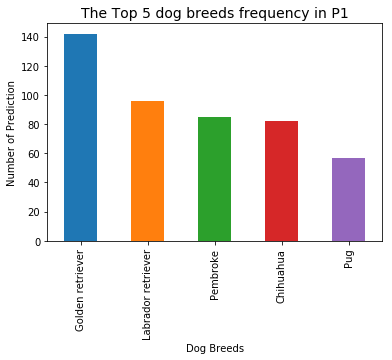

In [371]:
full_cleaned_df['p1'].value_counts(sort=True)[:5].plot(kind = 'bar')
plt.ylabel('Number of Prediction')
plt.title('The Top 5 dog breeds frequency in P1', size=14)
plt.xlabel('Dog Breeds')
plt.savefig('top_dog_breeds_P1');

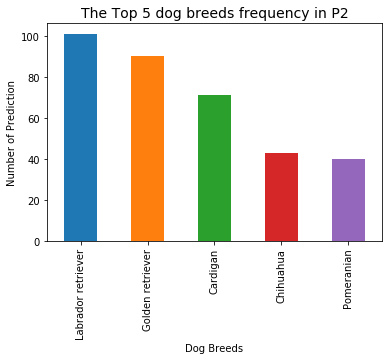

In [372]:
full_cleaned_df['p2'].value_counts(sort=True)[:5].plot(kind = 'bar')
plt.ylabel('Number of Prediction')
plt.title('The Top 5 dog breeds frequency in P2', size=14)
plt.xlabel('Dog Breeds')
plt.savefig('top_dog_breeds_P2');

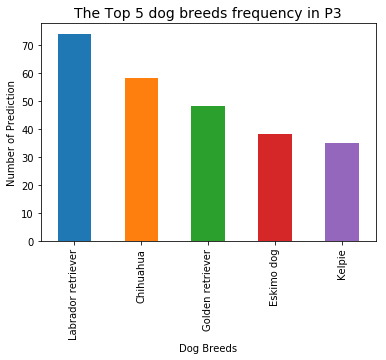

In [373]:
full_cleaned_df['p3'].value_counts(sort=True)[:5].plot(kind = 'bar')
plt.ylabel('Number of Prediction')
plt.title('The Top 5 dog breeds frequency in P3', size=14)
plt.xlabel('Dog Breeds')
plt.savefig('top_dog_breeds_P3');

> ### The most dog breeds in all the predictions were: Golden retriever, Labrador retriever, Chihuahua

#### What are the most frequent dog names?

In [374]:
full_cleaned_df.name.value_counts(sort=True)[:10]

None       637
Lucy        10
Charlie     10
Penny       10
Tucker      10
Oliver       9
Cooper       9
Sadie        8
Lola         7
Toby         7
Name: name, dtype: int64

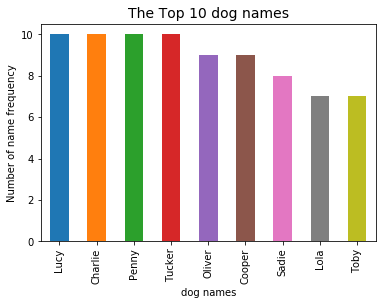

In [375]:
# Since the most frequent in the columns is null we exclude.
full_cleaned_df['name'].value_counts(sort=True)[1:10].plot(kind = 'bar')
plt.ylabel('Number of name frequency')
plt.title('The Top 10 dog names', size=14)
plt.xlabel('dog names')
plt.savefig('name_frequency');

#### What is the most common dog stage?

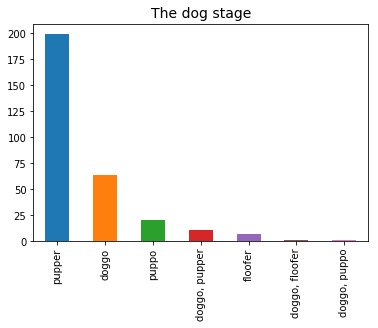

In [376]:
full_cleaned_df.dog_stage.value_counts().plot('bar')
plt.title('The dog stage', size=14)
#plt.axis('equal')
plt.savefig('dog_stage');

> ### The most common dog stage is: Pupper.

#### Visualize the number of tweets over time. 

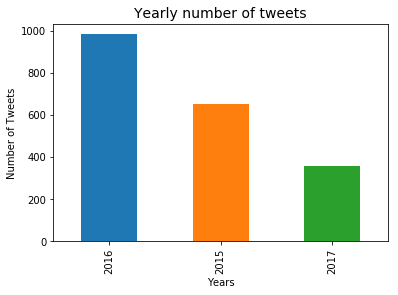

In [377]:
full_cleaned_df['timestamp'].dt.year.value_counts().plot('bar')
plt.title('Yearly number of tweets', size=14)
plt.xlabel('Years')
plt.ylabel('Number of Tweets')
plt.savefig('yearly_tweets');

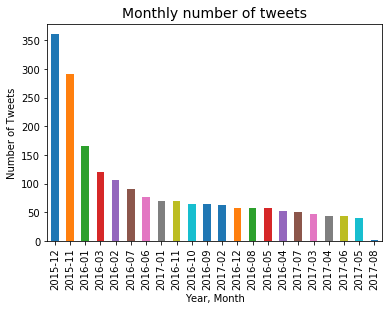

In [378]:
# ref: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
full_cleaned_df.timestamp.dt.to_period('M').value_counts().plot('bar')
plt.title('Monthly number of tweets', size=14)
plt.xlabel('Year, Month')
plt.ylabel('Number of Tweets')
plt.savefig('monthly_tweets');

> ### The popularity of the account starts at the end of 2015 and continue through 2016 then decrease in 2017.

#### What is the most common rating?

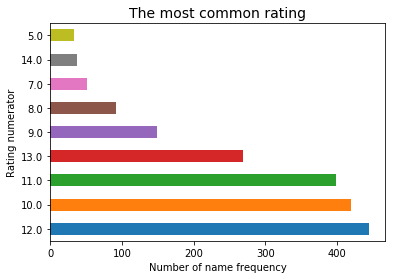

In [379]:
full_cleaned_df.rating_numerator.value_counts()[:5].plot('barh')
plt.title('The most common rating', size=14)
plt.xlabel('Number of name frequency')
plt.ylabel('Rating numerator')
plt.savefig('highest_rating');

> ### The most rating used is 12

#### Which dog received the highest rating?

In [380]:
# ref: https://thispointer.com/pandas-select-first-or-last-n-rows-in-a-dataframe-using-head-tail/
highest_rating = full_cleaned_df.sort_values(by=['rating_numerator'], ascending=False).head(1)
highest_rating


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
749,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,5569,...,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Bow tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


In [381]:
highest_rating.jpg_url

749    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [382]:
Image(url = 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

> ### The dog Atticus has received the highest rating in the dataset, which is 1776.

#### What is relationship between between Retweet and Favorite 

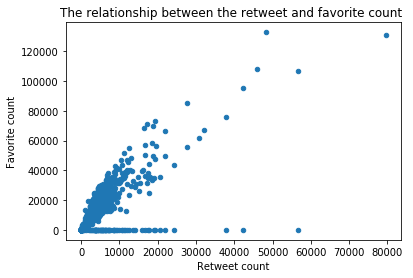

In [383]:
xx = full_cleaned_df.retweet_count
yy = full_cleaned_df.favorite_count
full_cleaned_df.plot(x="retweet_count", y="favorite_count", kind= 'scatter')
plt.title('The relationship between the retweet and favorite count ')
plt.xlabel('Retweet count')
plt.ylabel('Favorite count')
plt.show()
plt.savefig('retweet_favorite_relationship');

> #### The realtionshipt between the Retweet and Favorite is showing positive correlation.

### Top Insights:
1. The most dog breeds in all the predictions were: Golden retriever, Labrador retriever, Chihuahua.


2. The popularity of the account starts at the end of 2015 and continue through 2016 then decrease in 2017.
 

3. The realtionshipt between the Retweet and Favorite is showing positive correlation.
 